In [1]:
from pickle import load
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

import src.forward_model as FM
import src.beam_functions as BF
import src.sky_models as SM
from src.spherical_harmonics import RealSphericalHarmonics
RS = RealSphericalHarmonics()
from nregions_inference import nuarr
import nregions_inference as NRI

from chainconsumer import ChainConsumer
from emcee import EnsembleSampler

In [6]:
saveloc = "Nregs_pl_gsmalo/"

def load_chain(savename, burn_in=5000, thin=1, suffix='_1'):
    """
    Load the chain, burning in, thinning and flattening.
    """
    chain = np.load(f"saves/{saveloc}"+savename+"_1.npy")
    chain = chain[5000::thin]
    ch_sh = np.shape(chain)
    chain_flat = np.reshape(chain, (ch_sh[0]*ch_sh[1], ch_sh[2]))  # Flatten chain.
    return chain_flat

def plot_chain(chain):
    """
    Plot the corner figure of the foreground inference.
    """
    c=ChainConsumer()
    params = [r'$\gamma_{n}$'.replace('n', str(n)) for n in range(1, Nreg+1)]
    c.add_chain(chain, parameters=params)
    c.plotter.plot()
    plt.show()

def showcase_model_residuals(chain, Nreg, savename):
    # Generate most-likely data.
    theta_mean = np.mean(chain, axis=0)

    # Load the observation parameters and instantiate the inferred model.
    with open(f"saves/{saveloc}{savename}_pars.pkl", 'rb') as f:
        pars = load(f)
    model = NRI.main(return_model=True, Nregions=Nreg, times=pars["times"], lmax=pars["lmax"], nside=pars["nside"])
    model_temps = model(theta=theta_mean)
    
    data = np.load(f"saves/{saveloc}{savename}_data.npy")
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(data, '.', label='data')
    ax[0].plot(model_temps, '.', label='model')
    ax[1].plot(data-model_temps, '.')
    ax[0].set_xlabel('bin')
    ax[1].set_xlabel('bin')
    ax[0].set_ylabel('Temperature [K]')
    ax[1].set_ylabel('Temperature residuals [K]')
    ax[0].legend()
    fig.tight_layout()
    fig.show()

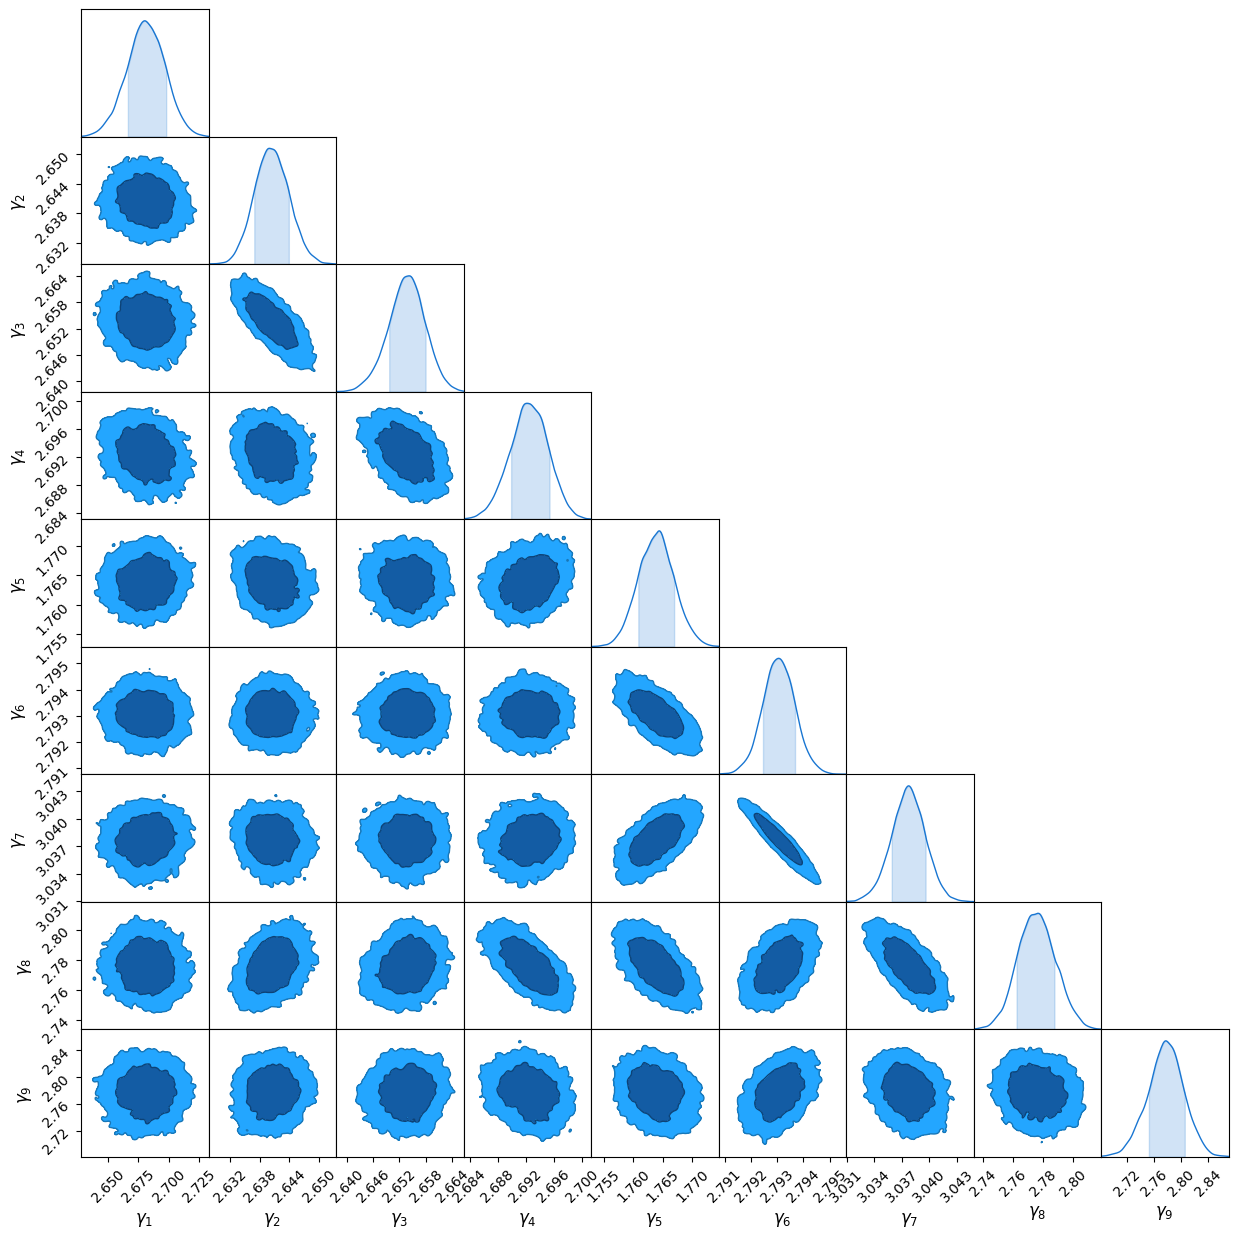

In [7]:
Nreg = 9
savename = f"{Nreg}reg_unoise"
chain = load_chain(savename, burn_in=30000, thin=10)
plot_chain(chain_clean)

/Users/yordani/Documents/boosted_compass/matrix-observer/src/spherical_harmonics.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  almr[idxr_p] = almc[idxc]
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm

3072 561


INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.00

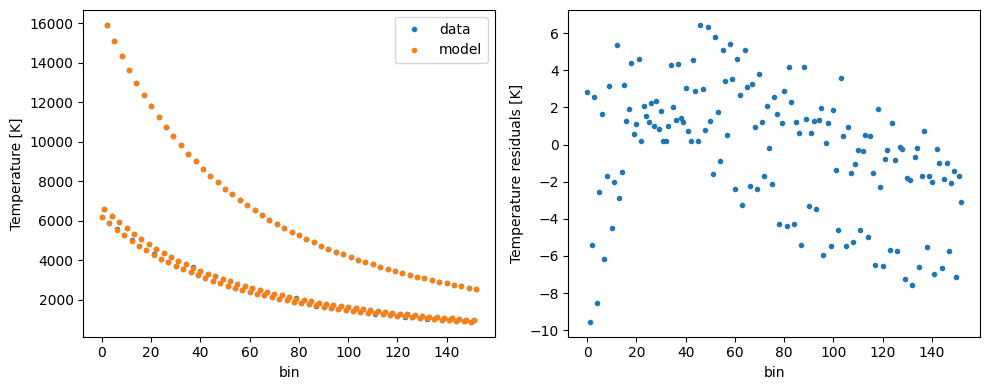

In [8]:
showcase_model_residuals(chain, Nreg, savename)

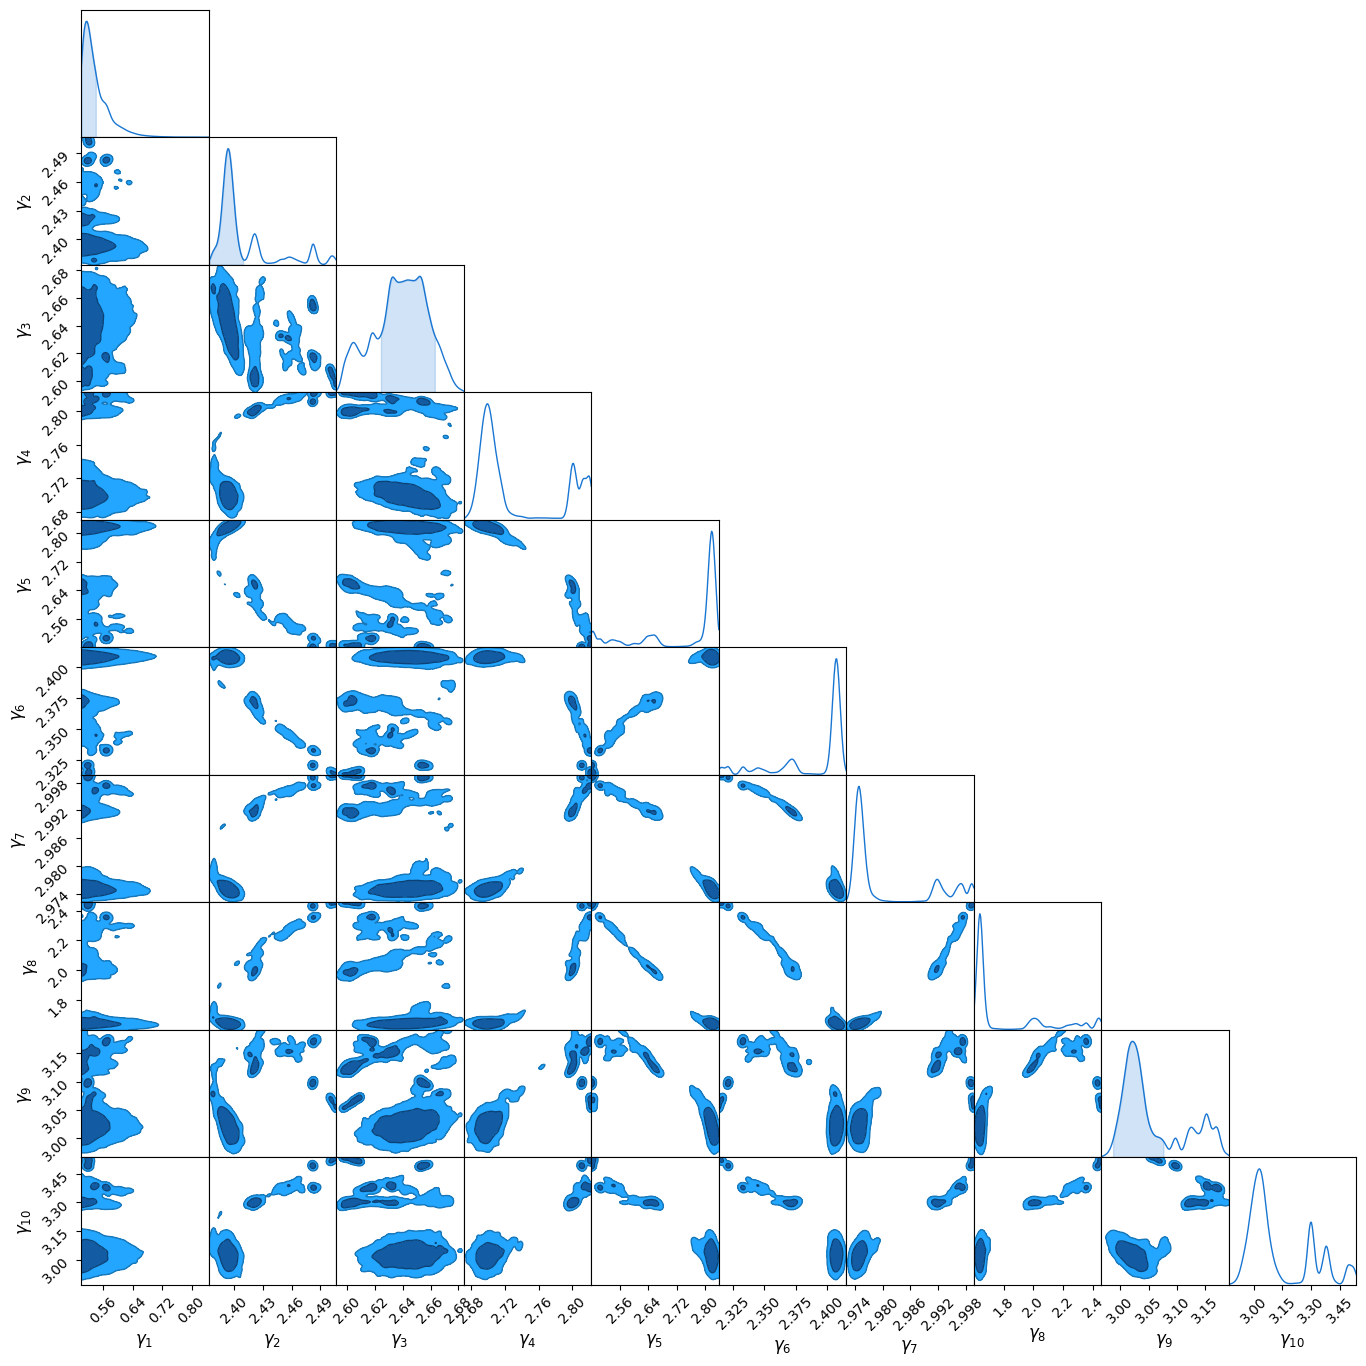

In [12]:
Nreg = 10
savename = f"{Nreg}reg_unoise"
chain = load_chain(savename, burn_in=30000, thin=10, suffix="_1")
plot_chain(chain)

/Users/yordani/Documents/boosted_compass/matrix-observer/src/spherical_harmonics.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  almr[idxr_p] = almc[idxc]
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm

3072 561


INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin
INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.00

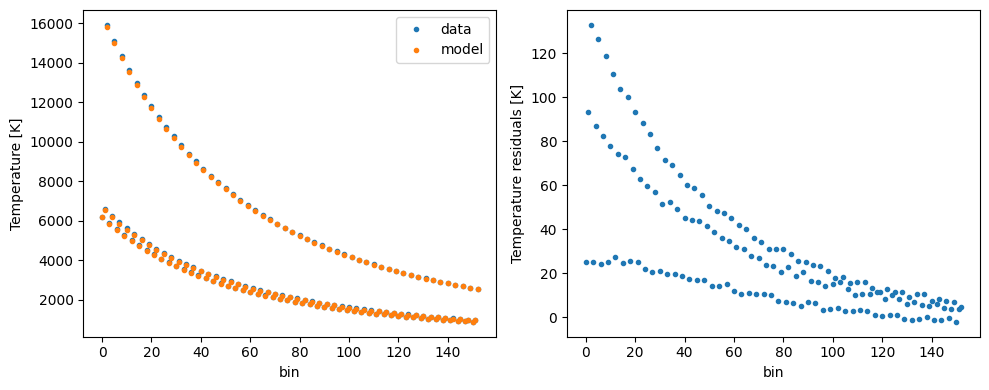

In [13]:
showcase_model_residuals(chain, Nreg, savename)

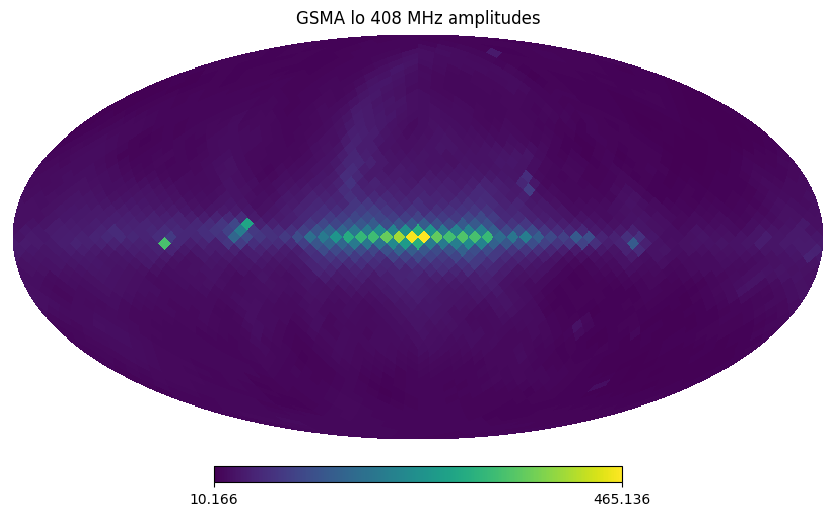

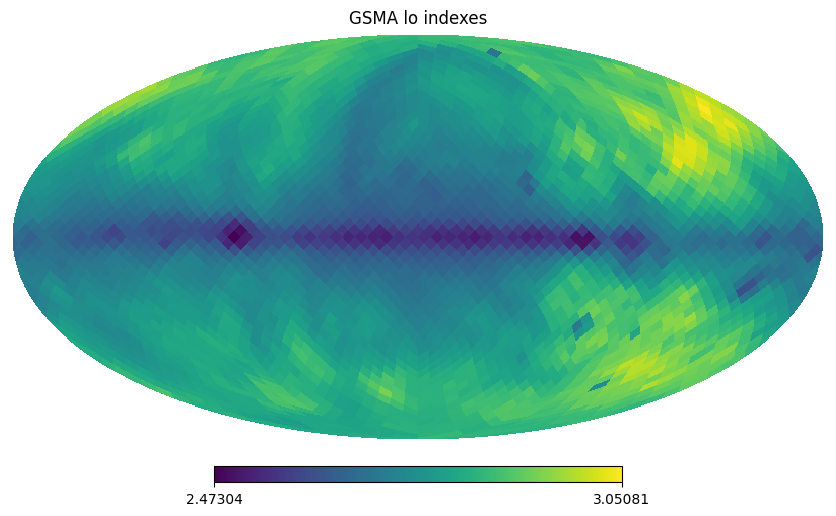

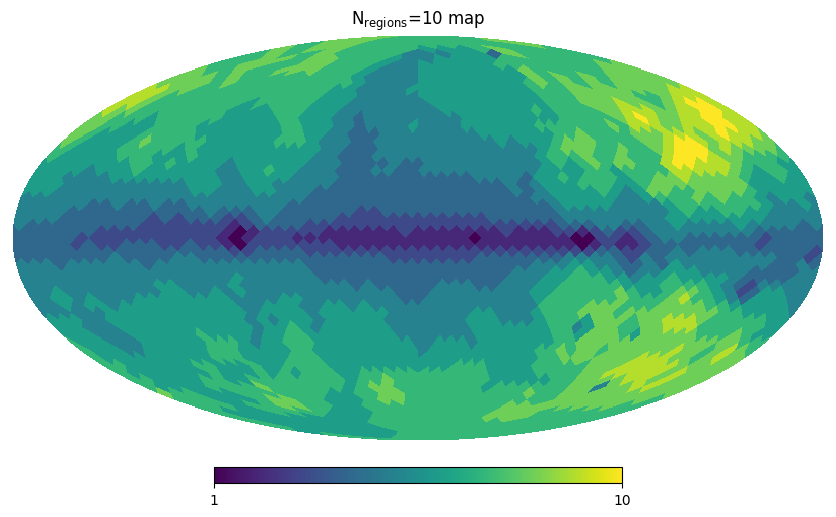

([array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([1., 0., 1., ..., 1., 1., 1.]),
  array([0., 1., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.])],
 array([[2.46303511, 2.5228125 ],
        [2.5228125 , 2.58258988],
        [2.58258988, 2.64236727],
        [2.64236727, 2.70214466],
        [2.70214466, 2.76192205],
        [2.76192205, 2.82169944],
        [2.82169944, 2.88147682],
        [2.88147682, 2.94125421],
        [2.94125421, 3.0010316 ],
        [3.0010316 , 3.06080899]]))

In [18]:
NRI.mask_split(Nregions=Nreg, visualise=True)

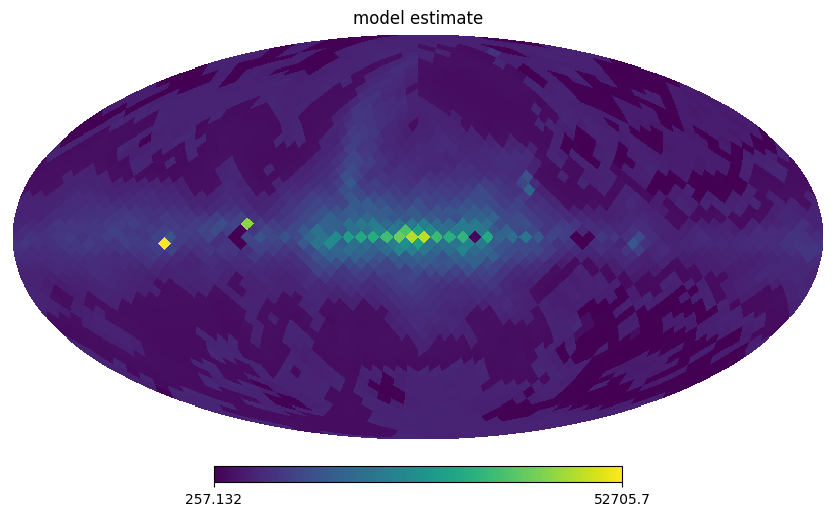

INFO:healpy:Sigma is 0.000000 arcmin (0.000000 rad) 
INFO:healpy:-> fwhm is 0.000000 arcmin


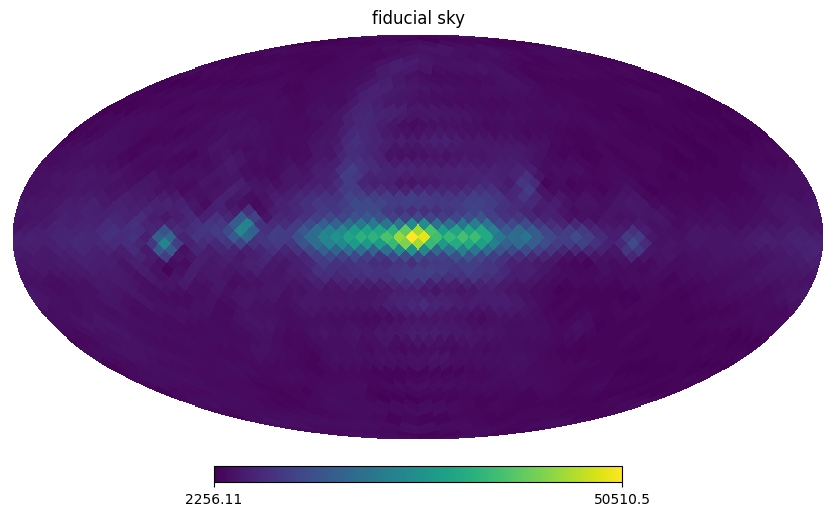

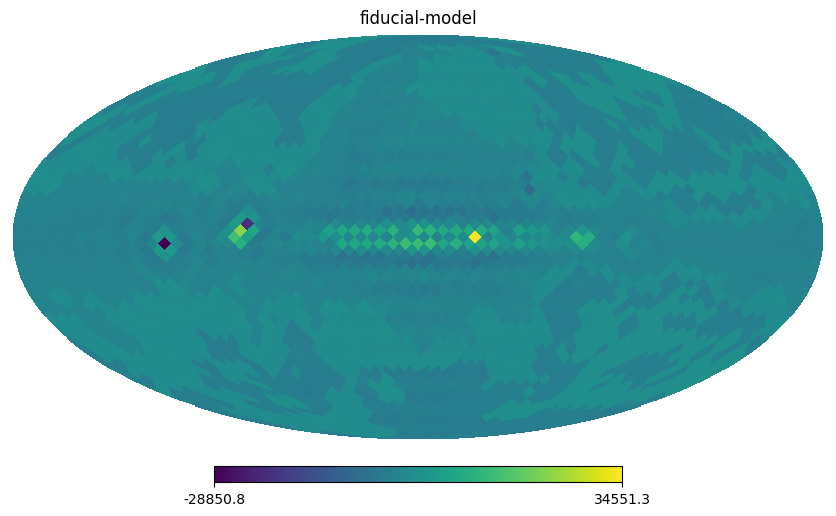

In [17]:
from src.nregions_models import pix_forward_model_pl
indx = np.load("anstey/indexes_16.npy")
theta_mean = np.mean(chain, axis=0)
theta_adjusted = np.array(theta_mean)

mask_maps, _ = NRI.mask_split(Nregions=Nreg)



hp.mollview(np.split(pix_forward_model_pl(powers=theta_adjusted, nuarr=nuarr, base_map=indx[0], masks=mask_maps), 51)[10], title='model estimate')
plt.show()
_, gsma_lo = SM.foreground_gsma_alm_nsidelo(nu=60, lmax=32, nside=16, map=True)
hp.mollview(gsma_lo[0], title='fiducial sky')
plt.show()
hp.mollview(gsma_lo[0]-np.split(pix_forward_model_pl(powers=theta_adjusted, nuarr=nuarr, base_map=indx[0], masks=mask_maps), 51)[10], title='fiducial-model')
plt.show()